In [1]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:160358],all_data.loc[160359:]

In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC
# from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# from sklearn import cross_validation, metrics
from sklearn import  metrics
from sklearn.model_selection import cross_validate

import types
def __iter__(self): return 0

In [3]:
# train_data=pd.read_csv("Predictive_maintenance_Hackathon_on_NASA_Turbofan_data-Kaggle/train_data.csv", sep=",")
# test_data=pd.read_csv("Predictive_maintenance_Hackathon_on_NASA_Turbofan_data-Kaggle/test_data.csv", sep=",")

train_data=pd.read_csv("prehackathonsup/train_data/train_data.csv", sep=",")
test_data=pd.read_csv("prehackathonsup/test_data/test_data.csv", sep=",")

In [4]:
pd.set_option('display.max_columns', None)

print("first_10_row_of_train_data")
display(train_data.head(10))
print("last_10_row_of_test_data")
display(test_data.tail(10))

first_10_row_of_train_data


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,RUL
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,1915.47,8019.94,0.94,36.70,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,NaN,NaN,NaN,NaN,NaN,NaN,339
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,2223.06,8361.86,1.03,41.78,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,NaN,NaN,NaN,NaN,NaN,NaN,338
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,1915.49,8021.37,0.94,36.49,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,NaN,NaN,NaN,NaN,NaN,NaN,337
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,2212.03,8319.14,1.02,41.78,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,NaN,NaN,NaN,NaN,NaN,NaN,336
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,2223.10,8357.89,1.03,41.79,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,NaN,NaN,NaN,NaN,NaN,NaN,335
5,0,6,0.0006,0.0020,100.0,518.67,642.38,1585.15,1406.47,14.62,21.61,554.32,2388.01,9071.84,1.30,47.27,522.19,2388.09,8146.41,8.4000,0.03,393,2388,100.00,38.95,23.4159,NaN,NaN,NaN,NaN,NaN,NaN,334
6,0,7,42.0004,0.8404,100.0,445.00,549.56,1351.51,1122.49,3.91,5.71,139.46,2212.12,8334.02,1.02,41.93,130.61,2388.27,8095.63,9.3249,0.02,330,2212,100.00,10.74,6.3616,NaN,NaN,NaN,NaN,NaN,NaN,333
7,0,8,42.0045,0.8400,100.0,445.00,549.38,1348.67,1107.57,3.91,5.72,139.05,2212.16,8331.19,1.02,41.86,130.30,2388.25,8095.93,9.3359,0.02,328,2212,100.00,10.60,6.3374,NaN,NaN,NaN,NaN,NaN,NaN,332
8,0,9,42.0006,0.8400,100.0,445.00,548.96,1354.82,1117.92,3.91,5.71,138.17,2212.09,8326.73,1.02,41.89,130.50,2388.19,8094.59,9.3223,0.02,329,2212,100.00,10.57,6.5141,NaN,NaN,NaN,NaN,NaN,NaN,331
9,0,10,10.0071,0.2500,100.0,489.05,604.48,1489.83,1298.72,10.52,15.49,395.02,2318.83,8792.85,1.26,45.19,372.41,2388.09,8144.53,8.6128,0.03,369,2319,100.00,28.63,17.1546,NaN,NaN,NaN,NaN,NaN,NaN,330


last_10_row_of_test_data


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
104887,706,110,-0.0003,0.0001,100.0,518.67,642.73,1589.38,1407.90,14.62,21.61,554.03,2388.11,9055.43,1.3,47.75,521.15,2388.13,8137.15,8.4143,0.03,394,2388,100.0,38.96,23.2162,NaN,NaN,NaN,NaN,NaN,NaN
104888,706,111,-0.0032,0.0000,100.0,518.67,642.53,1597.86,1410.17,14.62,21.61,553.68,2388.06,9055.81,1.3,47.53,521.53,2388.11,8136.69,8.3955,0.03,394,2388,100.0,38.99,23.3041,NaN,NaN,NaN,NaN,NaN,NaN
104889,706,112,-0.0019,-0.0004,100.0,518.67,642.77,1587.28,1403.28,14.62,21.61,554.04,2388.09,9057.26,1.3,47.45,521.40,2388.09,8135.37,8.4286,0.03,394,2388,100.0,38.85,23.3164,NaN,NaN,NaN,NaN,NaN,NaN
104890,706,113,-0.0013,0.0003,100.0,518.67,643.03,1592.20,1411.47,14.62,21.61,552.67,2388.11,9056.50,1.3,47.50,521.74,2388.11,8135.55,8.4530,0.03,394,2388,100.0,38.77,23.3108,NaN,NaN,NaN,NaN,NaN,NaN
104891,706,114,0.0015,0.0000,100.0,518.67,643.32,1585.29,1397.23,14.62,21.61,553.66,2388.13,9062.00,1.3,47.59,521.43,2388.11,8128.58,8.4572,0.03,394,2388,100.0,38.97,23.2417,NaN,NaN,NaN,NaN,NaN,NaN
104892,706,115,-0.0022,0.0002,100.0,518.67,642.69,1595.77,1413.75,14.62,21.61,553.22,2388.13,9050.94,1.3,47.48,520.77,2388.09,8133.01,8.4737,0.03,394,2388,100.0,38.90,23.3045,NaN,NaN,NaN,NaN,NaN,NaN
104893,706,116,0.0018,-0.0001,100.0,518.67,643.26,1590.79,1407.73,14.62,21.61,553.16,2388.08,9060.70,1.3,47.57,520.93,2388.12,8137.96,8.4448,0.03,392,2388,100.0,38.95,23.2379,NaN,NaN,NaN,NaN,NaN,NaN
104894,706,117,-0.0047,-0.0004,100.0,518.67,642.78,1590.92,1410.99,14.62,21.61,553.13,2388.13,9053.77,1.3,47.52,521.35,2388.11,8129.24,8.4646,0.03,394,2388,100.0,38.63,23.2412,NaN,NaN,NaN,NaN,NaN,NaN
104895,706,118,-0.0008,0.0001,100.0,518.67,642.85,1588.09,1413.42,14.62,21.61,553.59,2388.11,9053.55,1.3,47.56,521.54,2388.13,8137.72,8.4234,0.03,393,2388,100.0,38.75,23.3305,NaN,NaN,NaN,NaN,NaN,NaN
104896,706,119,0.0005,0.0001,100.0,518.67,642.86,1593.63,1408.34,14.62,21.61,553.45,2388.18,9065.98,1.3,47.49,520.79,2388.12,8136.21,8.4338,0.03,393,2388,100.0,38.81,23.3081,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")

train_data_contains: 160359 row and 33 columns
test_data_contains: 104897 row and 32 columns


In [6]:
print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


engine_no              0
time_in_cycles         0
op_setting_1           0
op_setting_2           0
op_setting_3           0
sensor_1               0
sensor_2               0
sensor_3               0
sensor_4               0
sensor_5               0
sensor_6               0
sensor_7               0
sensor_8               0
sensor_9               0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15              0
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22         160359
sensor_23         160359
sensor_24         160359
sensor_25         160359
sensor_26         160359
sensor_27         160359
RUL                    0
dtype: int64

missing_value_in_test_data


engine_no              0
time_in_cycles         0
op_setting_1           0
op_setting_2           0
op_setting_3           0
sensor_1               0
sensor_2               0
sensor_3               0
sensor_4               0
sensor_5               0
sensor_6               0
sensor_7               0
sensor_8               0
sensor_9               0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15              0
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22         104897
sensor_23         104897
sensor_24         104897
sensor_25         104897
sensor_26         104897
sensor_27         104897
dtype: int64

In [7]:
train_data=train_data.drop(columns=['sensor_22','sensor_23','sensor_24','sensor_25','sensor_26','sensor_27'])
test_data=test_data.drop(columns=['sensor_22','sensor_23','sensor_24','sensor_25','sensor_26','sensor_27'])

In [8]:
print("first_10_row_of_train_data")
display(train_data.head(10))
print("last_10_row_of_test_data")
display(test_data.tail(10))

first_10_row_of_train_data


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,1915.47,8019.94,0.94,36.70,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,339
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,2223.06,8361.86,1.03,41.78,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,338
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,1915.49,8021.37,0.94,36.49,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,337
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,2212.03,8319.14,1.02,41.78,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,336
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,2223.10,8357.89,1.03,41.79,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,335
5,0,6,0.0006,0.0020,100.0,518.67,642.38,1585.15,1406.47,14.62,21.61,554.32,2388.01,9071.84,1.30,47.27,522.19,2388.09,8146.41,8.4000,0.03,393,2388,100.00,38.95,23.4159,334
6,0,7,42.0004,0.8404,100.0,445.00,549.56,1351.51,1122.49,3.91,5.71,139.46,2212.12,8334.02,1.02,41.93,130.61,2388.27,8095.63,9.3249,0.02,330,2212,100.00,10.74,6.3616,333
7,0,8,42.0045,0.8400,100.0,445.00,549.38,1348.67,1107.57,3.91,5.72,139.05,2212.16,8331.19,1.02,41.86,130.30,2388.25,8095.93,9.3359,0.02,328,2212,100.00,10.60,6.3374,332
8,0,9,42.0006,0.8400,100.0,445.00,548.96,1354.82,1117.92,3.91,5.71,138.17,2212.09,8326.73,1.02,41.89,130.50,2388.19,8094.59,9.3223,0.02,329,2212,100.00,10.57,6.5141,331
9,0,10,10.0071,0.2500,100.0,489.05,604.48,1489.83,1298.72,10.52,15.49,395.02,2318.83,8792.85,1.26,45.19,372.41,2388.09,8144.53,8.6128,0.03,369,2319,100.00,28.63,17.1546,330


last_10_row_of_test_data


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
104887,706,110,-0.0003,0.0001,100.0,518.67,642.73,1589.38,1407.90,14.62,21.61,554.03,2388.11,9055.43,1.3,47.75,521.15,2388.13,8137.15,8.4143,0.03,394,2388,100.0,38.96,23.2162
104888,706,111,-0.0032,0.0000,100.0,518.67,642.53,1597.86,1410.17,14.62,21.61,553.68,2388.06,9055.81,1.3,47.53,521.53,2388.11,8136.69,8.3955,0.03,394,2388,100.0,38.99,23.3041
104889,706,112,-0.0019,-0.0004,100.0,518.67,642.77,1587.28,1403.28,14.62,21.61,554.04,2388.09,9057.26,1.3,47.45,521.40,2388.09,8135.37,8.4286,0.03,394,2388,100.0,38.85,23.3164
104890,706,113,-0.0013,0.0003,100.0,518.67,643.03,1592.20,1411.47,14.62,21.61,552.67,2388.11,9056.50,1.3,47.50,521.74,2388.11,8135.55,8.4530,0.03,394,2388,100.0,38.77,23.3108
104891,706,114,0.0015,0.0000,100.0,518.67,643.32,1585.29,1397.23,14.62,21.61,553.66,2388.13,9062.00,1.3,47.59,521.43,2388.11,8128.58,8.4572,0.03,394,2388,100.0,38.97,23.2417
104892,706,115,-0.0022,0.0002,100.0,518.67,642.69,1595.77,1413.75,14.62,21.61,553.22,2388.13,9050.94,1.3,47.48,520.77,2388.09,8133.01,8.4737,0.03,394,2388,100.0,38.90,23.3045
104893,706,116,0.0018,-0.0001,100.0,518.67,643.26,1590.79,1407.73,14.62,21.61,553.16,2388.08,9060.70,1.3,47.57,520.93,2388.12,8137.96,8.4448,0.03,392,2388,100.0,38.95,23.2379
104894,706,117,-0.0047,-0.0004,100.0,518.67,642.78,1590.92,1410.99,14.62,21.61,553.13,2388.13,9053.77,1.3,47.52,521.35,2388.11,8129.24,8.4646,0.03,394,2388,100.0,38.63,23.2412
104895,706,118,-0.0008,0.0001,100.0,518.67,642.85,1588.09,1413.42,14.62,21.61,553.59,2388.11,9053.55,1.3,47.56,521.54,2388.13,8137.72,8.4234,0.03,393,2388,100.0,38.75,23.3305
104896,706,119,0.0005,0.0001,100.0,518.67,642.86,1593.63,1408.34,14.62,21.61,553.45,2388.18,9065.98,1.3,47.49,520.79,2388.12,8136.21,8.4338,0.03,393,2388,100.0,38.81,23.3081


In [9]:
### train_data.describe()

print("train_data_describe")
display(train_data.describe())
print("test_data_describe")
display(test_data.describe())

train_data_describe


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,353.441665,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,2273.829707,8677.553696,1.153705,44.212049,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700,122.331338
std,205.969348,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,142.426613,374.657454,0.142103,3.426342,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067,83.538146
min,0.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500,0.000000
25%,172.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,2212.120000,8334.770000,1.020000,42.010000,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300,56.000000
50%,355.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,2319.370000,8764.200000,1.090000,44.930000,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500,113.000000
75%,530.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,2388.050000,9055.850000,1.300000,47.340000,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600,172.000000
max,708.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,2388.640000,9244.590000,1.320000,48.530000,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,542.000000


test_data_describe


,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,354.311038,95.406589,17.243810,0.410887,95.748591,485.791314,597.153354,1464.738375,1257.240382,9.887805,14.412914,359.377679,2273.867033,8671.465814,1.153026,44.097986,338.437014,2349.811235,8084.687648,9.046593,0.025039,360.088096,2273.841797,98.398282,25.949868,15.570426
std,205.249543,74.311486,16.530141,0.368078,12.328151,30.426804,42.430629,117.856835,135.728855,4.265536,6.443315,174.056960,142.135430,373.202306,0.142029,3.408337,164.110284,110.890533,78.956087,0.748390,0.005000,30.932463,142.218102,4.644631,11.701010,7.020590
min,0.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.410000,1240.940000,1024.900000,3.910000,5.660000,136.060000,1914.900000,7987.030000,0.930000,36.030000,128.260000,2027.740000,7849.800000,8.198000,0.020000,302.000000,1915.000000,84.930000,10.180000,6.123100
25%,174.000000,38.000000,0.001300,0.000200,100.000000,449.440000,549.780000,1355.140000,1124.030000,5.480000,8.000000,175.720000,2212.050000,8329.540000,1.020000,41.920000,164.800000,2387.950000,8068.360000,8.425600,0.020000,331.000000,2212.000000,100.000000,14.340000,8.607300
50%,357.000000,80.000000,19.998200,0.620000,100.000000,489.050000,605.530000,1490.160000,1262.850000,9.350000,13.660000,337.510000,2319.110000,8751.850000,1.080000,44.740000,317.630000,2388.050000,8113.100000,9.108500,0.030000,367.000000,2319.000000,100.000000,24.780000,14.872400
75%,534.000000,135.000000,35.001500,0.840000,100.000000,518.670000,642.200000,1584.810000,1399.460000,14.620000,21.610000,553.580000,2388.030000,9052.680000,1.300000,47.260000,521.590000,2388.110000,8136.630000,9.333900,0.030000,392.000000,2388.000000,100.000000,38.880000,23.331000
max,706.000000,486.000000,42.008000,0.842000,100.000000,518.670000,644.320000,1609.690000,1434.120000,14.620000,21.610000,569.170000,2388.550000,9179.620000,1.320000,48.280000,536.600000,2389.960000,8243.100000,11.030000,0.030000,398.000000,2388.000000,100.000000,39.750000,23.849600


In [10]:
# df_all=concat_df(train_data,test_data)
# train_data,test_data=divide_df(df_all)

In [11]:
train_data['coming'] = np.where(((train_data.RUL <= 21) & ((train_data.RUL>=0))), 1, 0)
tips_summed = train_data.groupby(['coming'])['sensor_1'].count()
tips_summed

coming
0    144761
1     15598
Name: sensor_1, dtype: int64

In [12]:
print(train_data['coming'].mean())

0.0972692521155657


In [13]:
train_data.head(10)

,engine_no,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,coming
0,0,1,25.0074,0.6200,60.0,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,1915.47,8019.94,0.94,36.70,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,339,0
1,0,2,35.0072,0.8413,100.0,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,2223.06,8361.86,1.03,41.78,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,338,0
2,0,3,25.0053,0.6215,60.0,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,1915.49,8021.37,0.94,36.49,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,337,0
3,0,4,42.0045,0.8407,100.0,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,2212.03,8319.14,1.02,41.78,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,336,0
4,0,5,35.0046,0.8400,100.0,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,2223.10,8357.89,1.03,41.79,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,335,0
5,0,6,0.0006,0.0020,100.0,518.67,642.38,1585.15,1406.47,14.62,21.61,554.32,2388.01,9071.84,1.30,47.27,522.19,2388.09,8146.41,8.4000,0.03,393,2388,100.00,38.95,23.4159,334,0
6,0,7,42.0004,0.8404,100.0,445.00,549.56,1351.51,1122.49,3.91,5.71,139.46,2212.12,8334.02,1.02,41.93,130.61,2388.27,8095.63,9.3249,0.02,330,2212,100.00,10.74,6.3616,333,0
7,0,8,42.0045,0.8400,100.0,445.00,549.38,1348.67,1107.57,3.91,5.72,139.05,2212.16,8331.19,1.02,41.86,130.30,2388.25,8095.93,9.3359,0.02,328,2212,100.00,10.60,6.3374,332,0
8,0,9,42.0006,0.8400,100.0,445.00,548.96,1354.82,1117.92,3.91,5.71,138.17,2212.09,8326.73,1.02,41.89,130.50,2388.19,8094.59,9.3223,0.02,329,2212,100.00,10.57,6.5141,331,0
9,0,10,10.0071,0.2500,100.0,489.05,604.48,1489.83,1298.72,10.52,15.49,395.02,2318.83,8792.85,1.26,45.19,372.41,2388.09,8144.53,8.6128,0.03,369,2319,100.00,28.63,17.1546,330,0


In [14]:
train_data=train_data.drop(columns=['engine_no','time_in_cycles',     'op_setting_1','op_setting_2','op_setting_3',    'RUL'])
test_data=test_data.drop(columns=['engine_no','time_in_cycles',     'op_setting_1','op_setting_2','op_setting_3'])

In [15]:
train_data.head(20)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,coming
0,462.54,536.84,1256.52,1043.97,7.05,9.02,175.29,1915.47,8019.94,0.94,36.70,164.75,2028.38,7875.47,10.8850,0.02,306,1915,84.93,14.35,8.4712,0
1,449.44,555.44,1364.42,1128.75,5.48,8.00,194.71,2223.06,8361.86,1.03,41.78,183.67,2388.20,8073.12,9.2527,0.02,334,2223,100.00,14.88,8.9928,0
2,462.54,536.42,1265.94,1047.23,7.05,9.03,175.29,1915.49,8021.37,0.94,36.49,164.49,2028.40,7884.88,10.9054,0.02,307,1915,84.93,14.21,8.5107,0
3,445.00,549.41,1355.52,1115.81,3.91,5.72,138.92,2212.03,8319.14,1.02,41.78,130.67,2388.13,8093.08,9.3434,0.02,331,2212,100.00,10.63,6.4578,0
4,449.44,555.21,1361.04,1123.63,5.48,8.00,194.91,2223.10,8357.89,1.03,41.79,183.02,2388.19,8078.18,9.3287,0.02,334,2223,100.00,14.95,9.0279,0
5,518.67,642.38,1585.15,1406.47,14.62,21.61,554.32,2388.01,9071.84,1.30,47.27,522.19,2388.09,8146.41,8.4000,0.03,393,2388,100.00,38.95,23.4159,0
6,445.00,549.56,1351.51,1122.49,3.91,5.71,139.46,2212.12,8334.02,1.02,41.93,130.61,2388.27,8095.63,9.3249,0.02,330,2212,100.00,10.74,6.3616,0
7,445.00,549.38,1348.67,1107.57,3.91,5.72,139.05,2212.16,8331.19,1.02,41.86,130.30,2388.25,8095.93,9.3359,0.02,328,2212,100.00,10.60,6.3374,0
8,445.00,548.96,1354.82,1117.92,3.91,5.71,138.17,2212.09,8326.73,1.02,41.89,130.50,2388.19,8094.59,9.3223,0.02,329,2212,100.00,10.57,6.5141,0
9,489.05,604.48,1489.83,1298.72,10.52,15.49,395.02,2318.83,8792.85,1.26,45.19,372.41,2388.09,8144.53,8.6128,0.03,369,2319,100.00,28.63,17.1546,0


In [16]:
test_data.head(20)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,445.00,549.36,1342.05,1124.56,3.91,5.71,138.59,2211.83,8311.68,1.02,41.93,130.98,2387.90,8077.78,9.3092,0.02,329,2212,100.00,10.69,6.3956
1,445.00,548.83,1351.93,1116.28,3.91,5.71,138.20,2211.79,8312.85,1.02,41.92,130.30,2387.89,8077.82,9.3450,0.02,331,2212,100.00,10.55,6.3775
2,518.67,642.35,1583.74,1400.44,14.62,21.61,554.46,2388.07,9052.16,1.30,47.43,521.83,2388.04,8129.19,8.3840,0.03,392,2388,100.00,38.85,23.3483
3,445.00,549.69,1354.36,1125.55,3.91,5.72,139.05,2211.81,8310.83,1.02,41.83,131.15,2387.82,8082.04,9.3852,0.02,330,2212,100.00,10.56,6.4871
4,489.05,604.72,1496.65,1310.52,10.52,15.49,394.71,2318.91,8760.80,1.26,45.25,371.57,2388.10,8121.73,8.6074,0.03,370,2319,100.00,28.78,17.1987
5,489.05,604.68,1507.04,1308.53,10.52,15.49,394.32,2318.87,8773.51,1.26,45.36,372.03,2388.05,8121.25,8.6145,0.03,368,2319,100.00,28.61,17.1582
6,489.05,604.68,1506.31,1314.41,10.52,15.49,394.62,2318.84,8773.33,1.26,45.33,371.92,2388.10,8122.12,8.6176,0.03,368,2319,100.00,28.68,17.1937
7,462.54,536.91,1259.69,1045.17,7.05,9.02,175.84,1915.23,8003.08,0.94,36.63,164.61,2028.14,7869.28,10.8880,0.02,306,1915,84.93,14.50,8.6003
8,489.05,604.60,1496.49,1302.18,10.52,15.49,395.16,2318.90,8771.61,1.26,45.21,372.05,2388.12,8119.62,8.6640,0.03,367,2319,100.00,28.59,17.2014
9,491.19,607.39,1480.46,1251.77,9.35,13.65,335.10,2323.87,8714.31,1.08,44.20,315.36,2388.01,8054.81,9.2212,0.02,365,2324,100.00,24.57,14.8325


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sensor_1   160359 non-null  float64
 1   sensor_2   160359 non-null  float64
 2   sensor_3   160359 non-null  float64
 3   sensor_4   160359 non-null  float64
 4   sensor_5   160359 non-null  float64
 5   sensor_6   160359 non-null  float64
 6   sensor_7   160359 non-null  float64
 7   sensor_8   160359 non-null  float64
 8   sensor_9   160359 non-null  float64
 9   sensor_10  160359 non-null  float64
 10  sensor_11  160359 non-null  float64
 11  sensor_12  160359 non-null  float64
 12  sensor_13  160359 non-null  float64
 13  sensor_14  160359 non-null  float64
 14  sensor_15  160359 non-null  float64
 15  sensor_16  160359 non-null  float64
 16  sensor_17  160359 non-null  int64  
 17  sensor_18  160359 non-null  int64  
 18  sensor_19  160359 non-null  float64
 19  sensor_20  160359 non-n

In [18]:
train_data['sensor_17'] = train_data.sensor_17.astype(float)
train_data['sensor_18'] = train_data.sensor_18.astype(float)

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104897 entries, 0 to 104896
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sensor_1   104897 non-null  float64
 1   sensor_2   104897 non-null  float64
 2   sensor_3   104897 non-null  float64
 3   sensor_4   104897 non-null  float64
 4   sensor_5   104897 non-null  float64
 5   sensor_6   104897 non-null  float64
 6   sensor_7   104897 non-null  float64
 7   sensor_8   104897 non-null  float64
 8   sensor_9   104897 non-null  float64
 9   sensor_10  104897 non-null  float64
 10  sensor_11  104897 non-null  float64
 11  sensor_12  104897 non-null  float64
 12  sensor_13  104897 non-null  float64
 13  sensor_14  104897 non-null  float64
 14  sensor_15  104897 non-null  float64
 15  sensor_16  104897 non-null  float64
 16  sensor_17  104897 non-null  int64  
 17  sensor_18  104897 non-null  int64  
 18  sensor_19  104897 non-null  float64
 19  sensor_20  104897 non-n

In [20]:
test_data['sensor_17'] = test_data.sensor_17.astype(float)
test_data['sensor_18'] = test_data.sensor_18.astype(float)

In [21]:
from sklearn.model_selection import train_test_split

X, y = train_data[['sensor_1','sensor_2','sensor_3','sensor_4','sensor_5','sensor_6','sensor_7',
                   'sensor_8','sensor_9','sensor_10','sensor_11','sensor_12','sensor_13','sensor_14',
                   'sensor_15','sensor_16','sensor_17','sensor_18','sensor_19','sensor_20','sensor_21']], train_data[['coming']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [22]:
#   from sklearn import tree
#   import pydotplus
#   from IPython.display import Image 
#   
#   # list of features we want to consider
#   splitting_features = [x for x in X_train.columns if x not in ['coming']]
#   
#   # initializing the tree model and training it
#   tree_model = tree.DecisionTreeClassifier()
#   tree_model = tree_model.fit(X_train, y_train)
#   
#   # generating a graphic for the tree
#   dot_data = tree.export_graphviz(tree_model, out_file=None, 
#                            feature_names=splitting_features,
#                            class_names = ['Benign', 'Malignant'],
#                            filled=True, rounded=True,  
#                            special_characters=True)  
#   graph = pydotplus.graph_from_dot_data(dot_data)  
#   Image(graph.create_png())

In [23]:
#   from sklearn import metrics
#   
#   #Predict test set:
#   test_predictions = tree_model.predict(X_test[splitting_features])
#   test_predprob = tree_model.predict_proba(X_test[splitting_features])[:,1]
#           
#   #Print model report:
#   print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
#   print("AUC Score: %f" % metrics.roc_auc_score(y_test['coming'], test_predprob))
#   

In [24]:
#   print(pd.crosstab(test_predictions, y_test.coming, dropna=False))

In [25]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# from sklearn import cross_validation
from sklearn.model_selection import cross_validate

In [26]:
# initializing our first model with an objective and learning rate
xgb0 = XGBClassifier(
 objective= 'binary:logistic',
 learning_rate = 0.1, 
 n_estimators = 300)

In [27]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors, cv_folds=5, early_stopping_rounds=50):
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[predictors].values, target['coming'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.92425+0.00913	test-auc:0.92068+0.00928
[1]	train-auc:0.93901+0.01167	test-auc:0.93496+0.01288
[2]	train-auc:0.95057+0.00791	test-auc:0.94752+0.00967
[3]	train-auc:0.95795+0.00521	test-auc:0.95516+0.00584
[4]	train-auc:0.96066+0.00498	test-auc:0.95791+0.00510
[5]	train-auc:0.96287+0.00380	test-auc:0.95980+0.00420
[6]	train-auc:0.96500+0.00426	test-auc:0.96201+0.00475
[7]	train-auc:0.96649+0.00403	test-auc:0.96360+0.00479
[8]	train-auc:0.97344+0.00179	test-auc:0.97014+0.00196
[9]	train-auc:0.97559+0.00124	test-auc:0.97240+0.00160
[10]	train-auc:0.97698+0.00142	test-auc:0.97349+0.00158
[11]	train-auc:0.97810+0.00045	test-auc:0.97466+0.00161
[12]	train-auc:0.98002+0.00049	test-auc:0.97643+0.00175
[13]	train-auc:0.98413+0.00118	test-auc:0.98057+0.00134
[14]	train-auc:0.98511+0.00083	test-auc:0.98153+0.00115
[15]	train-auc:0.98612+0.00109	test-auc:0.98255+0.00113
[16]	train-auc:0.98700+0.00099	test-auc:0.98337+0.00133
[17]	train-auc:0.98751+0.00086	test-auc:0.98397+0.00115
[1

/home/marryml/.virtual_environments/jupyterlab/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.9838
AUC Score (Train): 0.997200


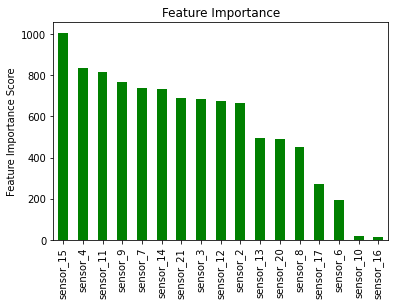

In [28]:
# a list of features to be used for training the model
features = [x for x in X_train.columns if x not in ['coming']]

# evaluating the first model
evaluate_model(xgb0, X_train, y_train, features)    #,     early_stopping_rounds=10)

In [29]:
from sklearn.model_selection import GridSearchCV

# updating our default model with the optimal number of estimators
xgb1 = XGBClassifier(
 objective = 'binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 
 use_label_encoder=False,
 verbosity= 0)

# array of values for max_depth and min_child_weight parameters
param_test1 = {'max_depth':range(3,7,1),'min_child_weight':range(0,11,1)}
# https://docs.ray.io/en/master/tune/tutorials/tune-xgboost.html

# grid search with cross-validation using the updated model and parameter value array 
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='roc_auc', cv=5)    ## iid=False,
gsearch1.fit(X_train[features],y_train['coming'])
gsearch1.cv_results_['params'], gsearch1.best_params_, gsearch1.best_score_

([{'max_depth': 3, 'min_child_weight': 0},
  {'max_depth': 3, 'min_child_weight': 1},
  {'max_depth': 3, 'min_child_weight': 2},
  {'max_depth': 3, 'min_child_weight': 3},
  {'max_depth': 3, 'min_child_weight': 4},
  {'max_depth': 3, 'min_child_weight': 5},
  {'max_depth': 3, 'min_child_weight': 6},
  {'max_depth': 3, 'min_child_weight': 7},
  {'max_depth': 3, 'min_child_weight': 8},
  {'max_depth': 3, 'min_child_weight': 9},
  {'max_depth': 3, 'min_child_weight': 10},
  {'max_depth': 4, 'min_child_weight': 0},
  {'max_depth': 4, 'min_child_weight': 1},
  {'max_depth': 4, 'min_child_weight': 2},
  {'max_depth': 4, 'min_child_weight': 3},
  {'max_depth': 4, 'min_child_weight': 4},
  {'max_depth': 4, 'min_child_weight': 5},
  {'max_depth': 4, 'min_child_weight': 6},
  {'max_depth': 4, 'min_child_weight': 7},
  {'max_depth': 4, 'min_child_weight': 8},
  {'max_depth': 4, 'min_child_weight': 9},
  {'max_depth': 4, 'min_child_weight': 10},
  {'max_depth': 5, 'min_child_weight': 0},
  {'max_d

In [30]:
# updating our current model with the max_depth and min_child weight parameter values found in last grid search
xgb2 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 max_depth=4,
 min_child_weight=8,
 # gamma=0,

 use_label_encoder=False,
 verbosity= 0 )

# array of values for the gamma parameter
gamma_test = {'gamma':[i/100.0 for i in range(0,25)]}

# grid search with cross-validation using the updated model and gamma value array 
gsearch2 = GridSearchCV(estimator = xgb2, param_grid = gamma_test, scoring='roc_auc', cv=5)     ## iid=False,
gsearch2.fit(X_train[features],y_train['coming'])
gsearch2.cv_results_['params'], gsearch2.best_params_, gsearch2.best_score_

([{'gamma': 0.0},
  {'gamma': 0.01},
  {'gamma': 0.02},
  {'gamma': 0.03},
  {'gamma': 0.04},
  {'gamma': 0.05},
  {'gamma': 0.06},
  {'gamma': 0.07},
  {'gamma': 0.08},
  {'gamma': 0.09},
  {'gamma': 0.1},
  {'gamma': 0.11},
  {'gamma': 0.12},
  {'gamma': 0.13},
  {'gamma': 0.14},
  {'gamma': 0.15},
  {'gamma': 0.16},
  {'gamma': 0.17},
  {'gamma': 0.18},
  {'gamma': 0.19},
  {'gamma': 0.2},
  {'gamma': 0.21},
  {'gamma': 0.22},
  {'gamma': 0.23},
  {'gamma': 0.24}],
 {'gamma': 0.05},
 0.9917089335062907)

[0]	train-auc:0.84291+0.00271	test-auc:0.84172+0.00507
[1]	train-auc:0.87209+0.02816	test-auc:0.87057+0.02810
[2]	train-auc:0.90990+0.00209	test-auc:0.90742+0.00263
[3]	train-auc:0.91269+0.00125	test-auc:0.91083+0.00161
[4]	train-auc:0.91671+0.00161	test-auc:0.91486+0.00236
[5]	train-auc:0.92207+0.00102	test-auc:0.92037+0.00255
[6]	train-auc:0.92877+0.00640	test-auc:0.92756+0.00628
[7]	train-auc:0.93831+0.00512	test-auc:0.93701+0.00594
[8]	train-auc:0.94833+0.00578	test-auc:0.94688+0.00701
[9]	train-auc:0.95386+0.00253	test-auc:0.95248+0.00146
[10]	train-auc:0.95934+0.00204	test-auc:0.95751+0.00214
[11]	train-auc:0.96204+0.00097	test-auc:0.96005+0.00183
[12]	train-auc:0.96383+0.00169	test-auc:0.96184+0.00206
[13]	train-auc:0.96579+0.00116	test-auc:0.96418+0.00088
[14]	train-auc:0.96699+0.00128	test-auc:0.96511+0.00112
[15]	train-auc:0.96977+0.00091	test-auc:0.96771+0.00103
[16]	train-auc:0.97186+0.00106	test-auc:0.96973+0.00134
[17]	train-auc:0.97383+0.00049	test-auc:0.97171+0.00138
[1

/home/marryml/.virtual_environments/jupyterlab/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.9762
AUC Score (Train): 0.994401


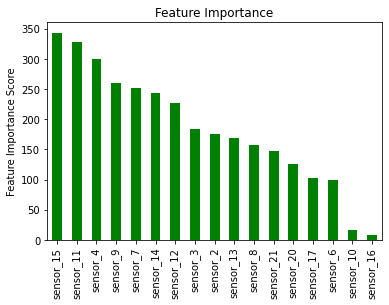

In [31]:
xgb_check = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 max_depth=4,
 min_child_weight=8,
 gamma=0.05)

evaluate_model(xgb_check, X_train, y_train, features)


In [32]:
# xgb0 Model Report
# Accuracy : 0.9778
# AUC Score (Train): 0.995067
# xgb0 Model Report n_estimators=300
# Accuracy : 0.9838
# AUC Score (Train): 0.997200

# why grid search tuning makes XGBoost performs worse???

In [33]:
# updating our current model with the most recent n_estimators
xgb3 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 max_depth=4,
 min_child_weight=8,
 gamma=0.05,
 
 use_label_encoder=False,
 verbosity= 0 )

# array of values for subsample and colsample_bytree parameters
sample_test = {
 'subsample':[i/10.0 for i in range(5,9)],
 'colsample_bytree':[i/10.0 for i in range(5,9)]
}

# grid search with cross validation for sampling parameters
gsearch3 = GridSearchCV(estimator = xgb3, param_grid = sample_test, scoring='roc_auc', cv=5)     ## iid=False,
gsearch3.fit(X_train[features],y_train['coming'])
gsearch3.cv_results_['params'], gsearch3.best_params_, gsearch3.best_score_

([{'colsample_bytree': 0.5, 'subsample': 0.5},
  {'colsample_bytree': 0.5, 'subsample': 0.6},
  {'colsample_bytree': 0.5, 'subsample': 0.7},
  {'colsample_bytree': 0.5, 'subsample': 0.8},
  {'colsample_bytree': 0.6, 'subsample': 0.5},
  {'colsample_bytree': 0.6, 'subsample': 0.6},
  {'colsample_bytree': 0.6, 'subsample': 0.7},
  {'colsample_bytree': 0.6, 'subsample': 0.8},
  {'colsample_bytree': 0.7, 'subsample': 0.5},
  {'colsample_bytree': 0.7, 'subsample': 0.6},
  {'colsample_bytree': 0.7, 'subsample': 0.7},
  {'colsample_bytree': 0.7, 'subsample': 0.8},
  {'colsample_bytree': 0.8, 'subsample': 0.5},
  {'colsample_bytree': 0.8, 'subsample': 0.6},
  {'colsample_bytree': 0.8, 'subsample': 0.7},
  {'colsample_bytree': 0.8, 'subsample': 0.8}],
 {'colsample_bytree': 0.5, 'subsample': 0.6},
 0.9920855872286781)

In [34]:
# updating our current model with the sampling parameters found in the last grid search
xgb4 = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 max_depth=4,
 min_child_weight=8,
 gamma=0.05, 
 subsample=0.6,
 colsample_bytree=0.5,

 use_label_encoder=False,
 verbosity= 0 )

# array of values for subsample and colsample_bytree parameters
reg_test = {'reg_alpha':[0, 0.01, 0.1], 'reg_lambda':[1, 1.1, 1.2, 1.3]}

# grid search with cross validation for regularization parameters
gsearch4 = GridSearchCV(estimator = xgb4, param_grid = reg_test, scoring='roc_auc', cv=5)     ## iid=False,
gsearch4.fit(X_train[features],y_train['coming'])
gsearch4.cv_results_['params'], gsearch4.best_params_, gsearch4.best_score_

([{'reg_alpha': 0, 'reg_lambda': 1},
  {'reg_alpha': 0, 'reg_lambda': 1.1},
  {'reg_alpha': 0, 'reg_lambda': 1.2},
  {'reg_alpha': 0, 'reg_lambda': 1.3},
  {'reg_alpha': 0.01, 'reg_lambda': 1},
  {'reg_alpha': 0.01, 'reg_lambda': 1.1},
  {'reg_alpha': 0.01, 'reg_lambda': 1.2},
  {'reg_alpha': 0.01, 'reg_lambda': 1.3},
  {'reg_alpha': 0.1, 'reg_lambda': 1},
  {'reg_alpha': 0.1, 'reg_lambda': 1.1},
  {'reg_alpha': 0.1, 'reg_lambda': 1.2},
  {'reg_alpha': 0.1, 'reg_lambda': 1.3}],
 {'reg_alpha': 0.01, 'reg_lambda': 1},
 0.9921082591688245)

[0]	train-auc:0.86275+0.00125	test-auc:0.86249+0.00427
[1]	train-auc:0.89473+0.02454	test-auc:0.89370+0.02297
[2]	train-auc:0.92367+0.01181	test-auc:0.92276+0.01181
[3]	train-auc:0.93889+0.00969	test-auc:0.93919+0.01134
[4]	train-auc:0.94384+0.01138	test-auc:0.94410+0.01182
[5]	train-auc:0.95262+0.01075	test-auc:0.95233+0.01095
[6]	train-auc:0.95569+0.00883	test-auc:0.95509+0.00978
[7]	train-auc:0.95861+0.00851	test-auc:0.95791+0.00924
[8]	train-auc:0.96515+0.00717	test-auc:0.96496+0.00630
[9]	train-auc:0.96756+0.00682	test-auc:0.96736+0.00560
[10]	train-auc:0.97143+0.00318	test-auc:0.97071+0.00233
[11]	train-auc:0.97171+0.00294	test-auc:0.97087+0.00236
[12]	train-auc:0.97367+0.00304	test-auc:0.97263+0.00251
[13]	train-auc:0.97506+0.00223	test-auc:0.97374+0.00148
[14]	train-auc:0.97645+0.00229	test-auc:0.97519+0.00157
[15]	train-auc:0.97872+0.00129	test-auc:0.97756+0.00093
[16]	train-auc:0.97941+0.00109	test-auc:0.97830+0.00054
[17]	train-auc:0.97988+0.00109	test-auc:0.97879+0.00053
[1

/home/marryml/.virtual_environments/jupyterlab/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 0.9762
AUC Score (Train): 0.994335


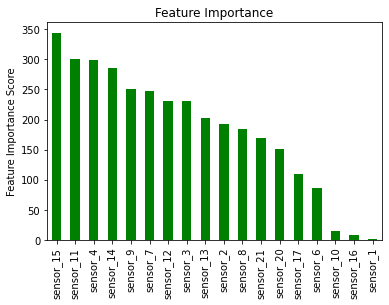

In [35]:
# updated model with alpha value found with last grid search. (lambda does not need to be set, since default is 1)
xgb_final = XGBClassifier(
 objective='binary:logistic',
 learning_rate =0.1,
 n_estimators=300,
 max_depth=4,
 min_child_weight=8,
 gamma=0.05,
 subsample=0.6,
 colsample_bytree=0.5,
 
 reg_alpha=0.01,
 reg_lambds=1)
evaluate_model(xgb_final, X_train, y_train, features)

In [36]:
test_features = [x for x in X_test.columns if x not in ['coming']]

#Predict test set:
test_predictions = xgb_final.predict(X_test[test_features])
test_predprob = xgb_final.predict_proba(X_test[test_features])[:,1]
    
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test['coming'], test_predprob))


######################### trying to inprove acc under this auc
df_testing = X_test.copy()
df_testing['P_FAIL'] = xgb_final1.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL < .000075)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test['coming'], df_testing['P_FAIL']))


Accuracy : 0.9719
AUC Score (Test): 0.992142


NameError: name 'xgb_final1' is not defined

In [37]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

import matplotlib.pylab as plt
%matplotlib inline

def model_fit(alg, train, target, predictors,    early_stopping_rounds=100):
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))
    


Model Report
Accuracy : 0.9998
AUC Score (Balanced): 0.999997


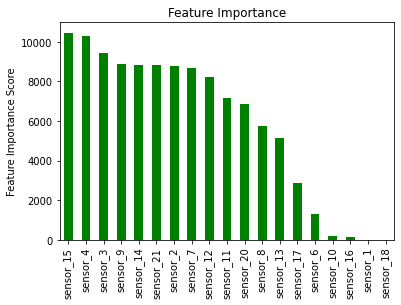

In [38]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# John hand tuning parameters, why it performs better than GridSearch, interesting

xgb_final1 = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,  # 500 ?? TRY try 
 max_depth=20,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 #nthread=4,
 
 use_label_encoder=False,
 verbosity= 0 ,
 
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, train, predictors)

model_fit(xgb_final1, X_train, y_train, features) 


In [39]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

from sklearn import metrics

#Predict test set:
test_predictions = xgb_final.predict(X_test[splitting_features])
test_predprob = xgb_final.predict_proba(X_test[splitting_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
print("AUC Score: %f" % metrics.roc_auc_score(y_test['coming'], test_predprob))


NameError: name 'splitting_features' is not defined

In [40]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

from sklearn import metrics

#Predict test set:
test_predictions = xgb_final1.predict(X_test[splitting_features])
test_predprob = xgb_final1.predict_proba(X_test[splitting_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
print("AUC Score: %f" % metrics.roc_auc_score(y_test['coming'], test_predprob))


NameError: name 'splitting_features' is not defined

In [ ]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(pd.crosstab(test_predictions, y_test.coming, dropna=False))


In [ ]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

from sklearn import metrics

#Predict test set:
test_predictions_final = xgb_final.predict(X_test[splitting_features])
test_predprob_final = xgb_final.predict_proba(X_test[splitting_features])[:,1]
        
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test['coming'].values, test_predictions))
print("AUC Score: %f" % metrics.roc_auc_score(y_test['coming'], test_predprob))


In [ ]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(pd.crosstab(test_predictions_final, y_test.coming, dropna=False))


In [ ]:
y_test.tail(60)